# socofing dataset meta data

소코핑 데이터 세트에는 600명의 아프리카 피험자에 속하는 6,000개의 지문이 포함(2번씩 찍은듯)
피험자 한 명당 지문이 10개이고 모든 피험자가 18세 이상입니다. 데이터셋에는 성별, 손 및 손가락 이름 레이블과 같은 고유 속성이 포함되어 있습니다. 
추가로 지문을 합성으로 STRANGY Tool을 사용하여 obliteration, central rotation,  z-cut 세 가지 다른 noise 데이터가 추가됨
분류를 위한 bench mark로서 활용을 하기 위한 것같다.

### data count 
total size =55,273
figerprint count = 6,000 *2 
altered data count = 6000*2*3 
total = 12000 + 6000*2*3 인줄 알았지만 논문을 보니 55,273개임.. altered가 17,934개라고 적혀있는거보면 어디서 alterd 한것이 빵구난듯 확인해봐야함
### data size
image 정보 idth = 96, height = 103 chnnel = 1 (grayscale)
### altered 
- obliteration 
Fingerprint 분야에서 "obliteration"은 지문 이미지를 완전히 손상시키는 기술을 의미합니다. 이 기술은 지문 보안 및 개인 정보 보호를 위해 사용될 수 있습니다. 지문 이미지를 완전히 지우거나 지문의 미세한 세부 사항을 모두 제거하여 해독을 방지할 수 있습니다. Obliteration 기술은 지문 인식 기술 개발 및 성능 평가에 중요한 역할을 합니다.
- central rotation 
Fingerprint 분야에서 "central rotation"은 지문 이미지를 회전시키는 기술을 의미합니다. 이 기술은 지문 이미지의 방향성을 변경하여 지문 인식 성능을 향상시키는 데 사용됩니다. Central rotation은 지문 이미지의 회전 각도를 중심 축 주변으로 변경하므로써 지문 이미지의 정보를 유지한 채로 지문 인식 기술의 성능을 개선할 수 있습니다. 이 기술은 지문 이미지의 회전 변형을 인식하는 능력을 강화하는 데 도움이 됩니다. 따라서 central rotation은 지문 인식 기술에서 중요한 역할을 합니다.
- z-cut 
Fingerprint 분야에서 "z-cut"은 지문 이미지에서 일부분을 잘라내는 기술을 의미합니다. 이 기술은 지문 이미지의 일부를 제거하여 지문 인식의 성능을 평가하고 개선하는 데 사용됩니다. Z-cut 기술은 지문 이미지에서 지문 끝부분을 제거하여 지문 인식의 정확도를 높이는 데 도움이 됩니다. 지문 이미지에서 양 끝의 일부를 제거함으로써 지문 이미지의 일부 변형을 인식하는 능력을 강화합니다. 따라서 z-cut은 지문 인식 기술에서 중요한 역할을 합니다.

1. Identifies the number of the subject: 001 to 600.
2. Indicates the gender of the subject: M – male, F – female.
3. Denotes the hand: Left or Right.
4. Indicates the finger name: little, ring, middle, index, or thumb.
5. Indicates the type of alteration type (altered images only): Obl – obliteration, CR – central rotation, or Zcut.
6. File extension: “.bmp” for all images. 



In [16]:
import os 
import cv2
import matplotlib as plt
import matplotlib.pyplot as plt
import natsort
import numpy as np
%matplotlib inline

In [17]:
#Grount Truth data 확인
gt_path1= './data/SOCOFing/Real/'
gt_path2  ='./data/socofing/SOCOFing/Real/'



gt_file_path1=[gt_path1+i for i in os.listdir(gt_path1)]
gt_file_path2=[gt_path2+i for i in os.listdir(gt_path2)]
#natsort는 문자열을 sort할때 사용하는 라이브러리!
gt_file_path1 = natsort.natsorted(gt_file_path1)
gt_file_path2 = natsort.natsorted(gt_file_path2)

gt_file1_size = len(gt_file_path1)
gt_file2_size = len(gt_file_path2)

print(gt_file1_size,gt_file2_size)
print(gt_file_path2[0:10],gt_file_path1[0:10]) 


6000 6000
['./data/socofing/SOCOFing/Real/1__M_Left_index_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Left_little_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Left_middle_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Left_ring_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Left_thumb_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Right_index_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Right_little_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Right_middle_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Right_ring_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Right_thumb_finger.BMP'] ['./data/SOCOFing/Real/1__M_Left_index_finger.BMP', './data/SOCOFing/Real/1__M_Left_little_finger.BMP', './data/SOCOFing/Real/1__M_Left_middle_finger.BMP', './data/SOCOFing/Real/1__M_Left_ring_finger.BMP', './data/SOCOFing/Real/1__M_Left_thumb_finger.BMP', './data/SOCOFing/Real/1__M_Right_index_finger.BMP', './data/SOCOFing/Real/1__M_Right_little_finger.BMP', './data/SOCOFing/Rea

In [58]:
gt_file1_test = [cv2.imread(i) for i in gt_file_path1[:10]]
gt_file2_test = [cv2.imread(i) for i in gt_file_path2[:10]]

['./data/socofing/SOCOFing/Real/1__M_Left_index_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Left_little_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Left_middle_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Left_ring_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Left_thumb_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Right_index_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Right_little_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Right_middle_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Right_ring_finger.BMP', './data/socofing/SOCOFing/Real/1__M_Right_thumb_finger.BMP', './data/socofing/SOCOFing/Real/2__F_Left_index_finger.BMP', './data/socofing/SOCOFing/Real/2__F_Left_little_finger.BMP', './data/socofing/SOCOFing/Real/2__F_Left_middle_finger.BMP', './data/socofing/SOCOFing/Real/2__F_Left_ring_finger.BMP', './data/socofing/SOCOFing/Real/2__F_Left_thumb_finger.BMP', './data/socofing/SOCOFing/Real/2__F_Right_index_finger.BMP', './data/socofing/SOCOFing/Real

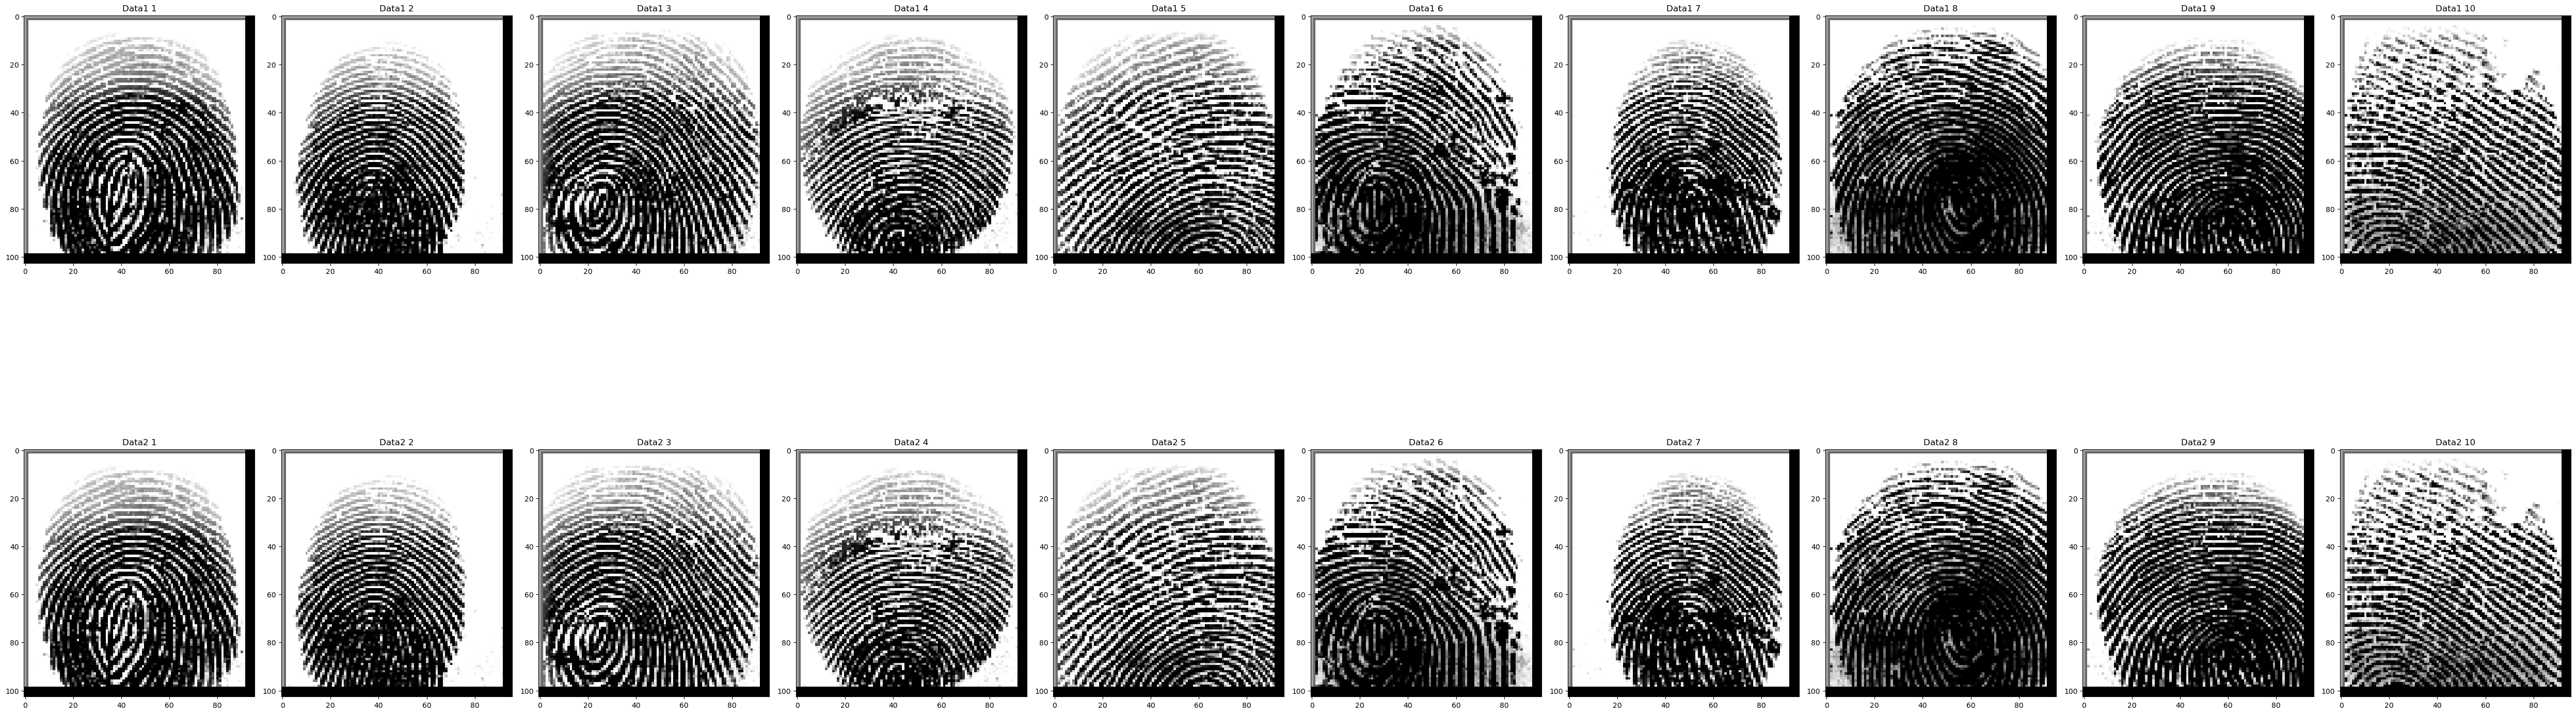

In [54]:

fig, axes = plt.subplots(2,10,figsize=(50,20))

for i, data in enumerate(gt_file1_test):
    axes[0][i].imshow(data)
    axes[0][i].set_title(f'Data1 {i+1}')
for i, data in enumerate(gt_file2_test):
    axes[1][i].imshow(data)
    axes[1][i].set_title(f'Data2 {i+1}')
    
plt.tight_layout()
plt.show()

In [62]:

print((gt_file1_test[1] == gt_file2_test[1]).any(),(gt_file1_test[0] == gt_file2_test[0]).any()) #왜 같은거 두개 넣었지..?

True True


In [86]:
#altered 된것도 확인해보자

altered_path = "/home/isol/study_opencv/fingerprint/data/socofing/SOCOFing/Altered/"
img_type = ["Altered-Easy","Altered-Medium","Altered-Hard"]
noise_type= ["obliteration", "central_rotation","z-cut"]
altered_easy_path = [os.path.join(altered_path,img_type[0],i) for i in (os.listdir(altered_path+img_type[0]))]
altered_medium_path = [os.path.join(altered_path,img_type[1],i) for i in (os.listdir(altered_path+img_type[1]))]
altered_hard_path = [os.path.join(altered_path,img_type[2],i) for i in (os.listdir(altered_path+img_type[2]))]

altered_easy_images=  [cv2.imread(path) for path in altered_easy_path]
altered_medium_images=  [cv2.imread(path) for path in altered_medium_path]
altered_hard_images=  [cv2.imread(path) for path in altered_hard_path]



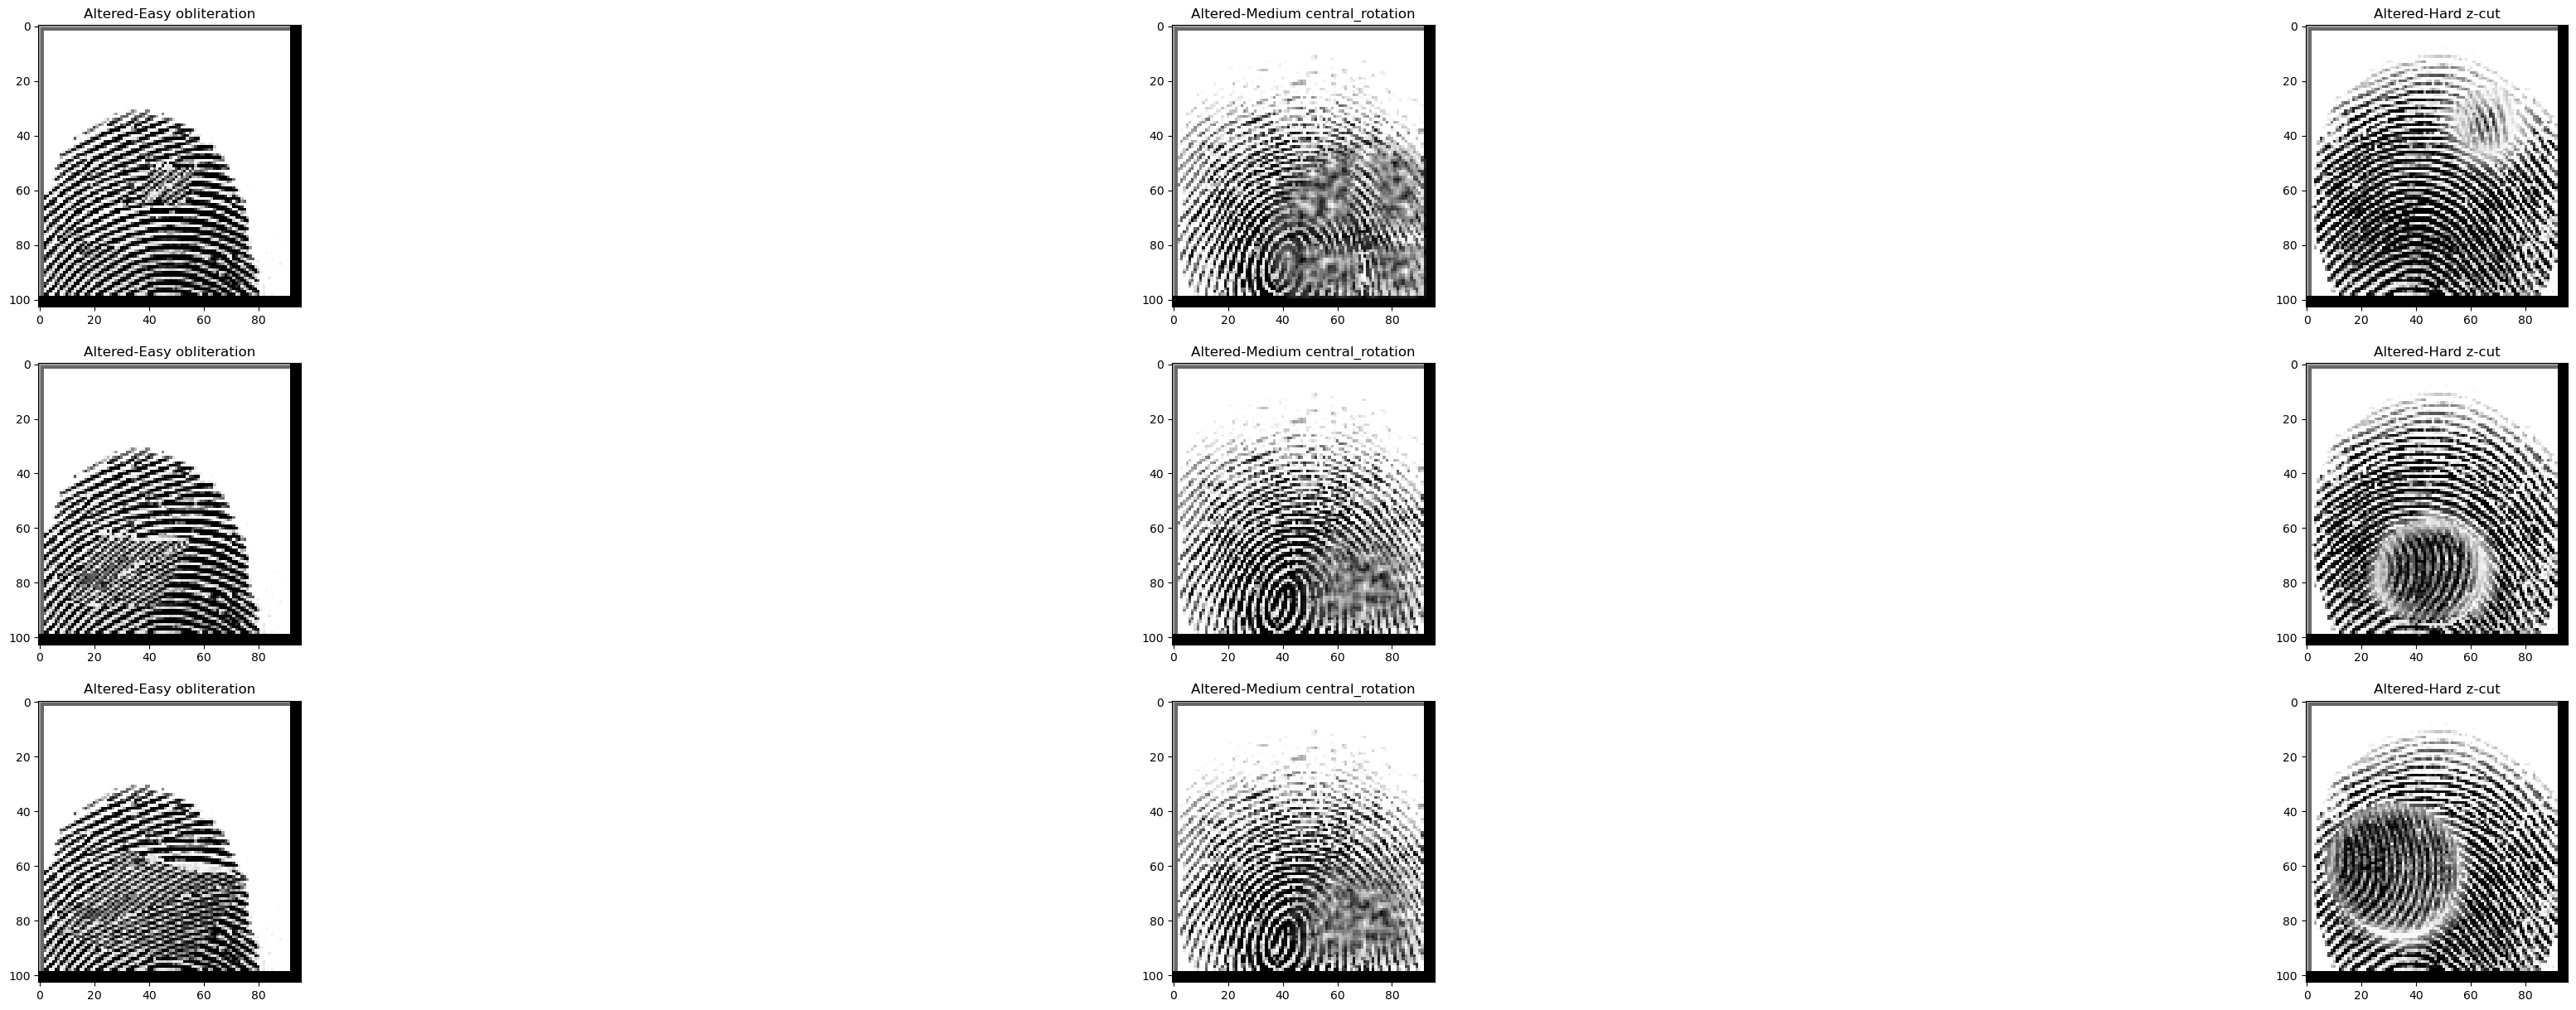

In [89]:
fig, axes = plt.subplots(3,3,figsize=(50,15))

for i, data in enumerate(zip(altered_easy_images[:3],altered_medium_images[:3],altered_hard_images[:3])):
    axes[0][i].imshow(data[0])
    axes[0][i].set_title(img_type[i]+' '+noise_type[i])
    axes[1][i].imshow(data[1])
    axes[1][i].set_title(img_type[i]+' '+noise_type[i])
    axes[2][i].imshow(data[2])
    axes[2][i].set_title(img_type[i]+' '+noise_type[i])

지문 데이터의 EDA(Exploratory Data Analysis)를 수행하기 위해서는 다음과 같은 단계를 따를 수 있습니다:

데이터 이해: 지문 데이터의 구성과 특성을 파악하고, 데이터가 어떻게 수집되었는지, 데이터의 크기 및 형식 등을 파악합니다.

- 결측값, 이상치, 중복값 등의 처리: 데이터에 결측값, 이상치, 중복값이 있는 경우 이를 처리해야 합니다.

분포 확인: 지문 데이터의 분포를 확인합니다. 예를 들어, 지문 데이터의 성별, 연령대, 직업 등의 분포를 확인하고 이를 시각화하여 파악합니다.

변수 간 관계 파악: 지문 데이터의 변수 간 관계를 파악합니다. 예를 들어, 지문 데이터의 지문 패턴과 인증 성공 여부, 지문 패턴과 손가락 크기 등의 관계를 파악합니다. 이를 위해 상관 분석, 회귀 분석 등의 분석 방법을 사용할 수 있습니다.

시각화: 분포나 변수 간 관계 등을 시각화하여 분석 결과를 이해하기 쉽게 만듭니다. 이를 위해 히스토그램, 산점도, 상자 그림 등의 그래프를 사용할 수 있습니다.

결과 해석: 분석 결과를 바탕으로 데이터의 특성과 문제점을 파악하고, 이를 해결하는 방법을 제시합니다. 이를 통해 지문 데이터의 품질을 개선하거나 보완할 수 있습니다.



